# Pregunta 1: Regresión lineal

In [213]:
import pandas as pd
import numpy as pdy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [214]:
df = pd.read_csv("Base_de_Datos.csv")
df = df.fillna(0)

In [215]:
df.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
0,1983,Activision,1.94,2,1,0,0,0,0,0,0,0,0,0,0
1,1983,Nintendo,10.96,0,4,0,0,0,1,1,0,0,0,0,0
2,1984,Activision,0.27,0,0,0,0,0,0,0,1,0,0,0,0
3,1984,Nintendo,45.56,1,0,0,1,2,1,2,2,0,0,0,0
4,1985,Activision,0.48,0,0,0,1,0,0,0,0,1,0,0,0


In [216]:
df.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
122,2015,Activision,35.63,17,3,0,0,9,5,4,0,0,0,0,1
123,2015,Electronic Arts,45.42,4,0,0,0,8,0,15,2,3,0,0,0
124,2015,Nintendo,27.08,7,4,0,4,1,6,1,0,1,0,7,1
125,2015,Sony Computer Entertainment,11.01,5,1,0,0,1,0,3,0,0,0,0,0
126,2015,Ubisoft,12.79,14,0,0,0,3,7,6,0,0,0,0,2


In [217]:
subdf = df[df['Publisher'].str.contains('Nintendo')]
subdf.head()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
1,1983,Nintendo,10.96,0,4,0,0,0,1,1,0,0,0,0,0
3,1984,Nintendo,45.56,1,0,0,1,2,1,2,2,0,0,0,0
5,1985,Nintendo,49.95,1,4,0,1,0,0,1,0,0,0,0,0
6,1986,Nintendo,16.18,3,2,0,0,0,0,0,1,0,0,0,0
8,1987,Nintendo,11.95,0,0,1,0,0,0,1,0,0,2,0,0


In [218]:
subdf.tail()

,Year,Publisher,Global_Sales,Action,Platform,Adventure,Puzzle,Shooter,Misc,Sports,Racing,Simulation,Fighting,Role-Playing,Strategy
104,2011,Nintendo,51.53,6,3,1,1,1,6,0,1,2,0,5,0
109,2012,Nintendo,56.47,7,2,1,1,0,6,2,0,2,1,9,0
114,2013,Nintendo,52.79,4,5,1,1,0,4,2,0,1,0,4,1
119,2014,Nintendo,48.65,4,3,0,1,0,2,2,1,1,2,4,0
124,2015,Nintendo,27.08,7,4,0,4,1,6,1,0,1,0,7,1


In [253]:
def test_train_split_plot(x_train, y_train, x_test, y_test):
    plt.scatter(x_train, y_train, label='Training Data', color='r', alpha=.7)
    plt.scatter(x_test, y_test, label='Testing Data', color='g', alpha=.7)
    plt.legend()
    plt.title("Test Train Split")
    plt.show()
    
def prediction(LR, x_test, y_test):
    prediction = LR.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label='Linear Regresion', color='b')
    plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
    plt.legend()
    plt.show()

def linear_regression(df, x, y):
    x_train, x_test, y_train, y_test = train_test_split(df[x], df[y])
    test_train_split_plot(x_train, y_train, x_test, y_test)
    LR = LinearRegression()
    LR.fit(x_train.values.reshape(-1, 1), y_train.values)
    prediction(LR, x_test, y_test)

<AxesSubplot:xlabel='Action', ylabel='Global_Sales'>

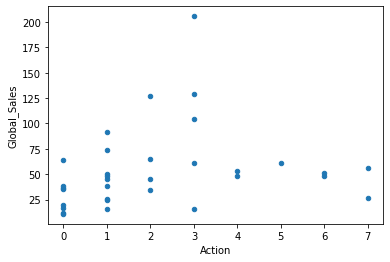

In [255]:
subdf.plot.scatter(x='Action', y='Global_Sales')

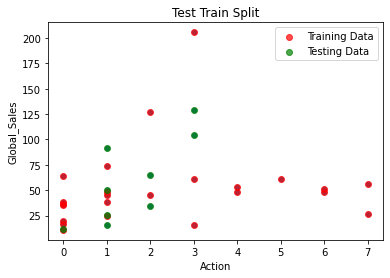

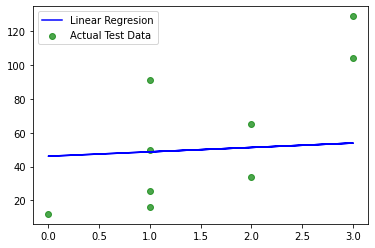

In [254]:
linear_regression(subdf, 'Action', 'Global_Sales')

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

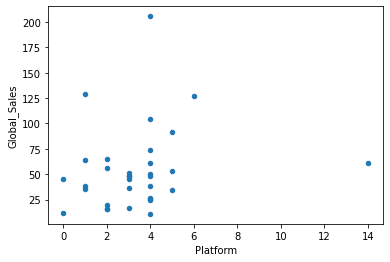

In [256]:
subdf.plot.scatter(x='Platform', y='Global_Sales')

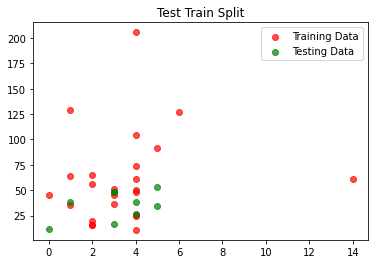

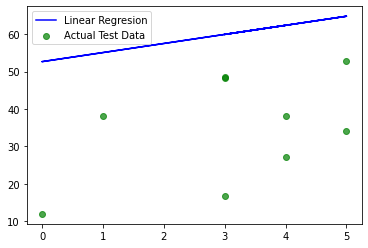

In [257]:
linear_regression(subdf, 'Platform', 'Global_Sales')

<AxesSubplot:xlabel='Adventure', ylabel='Global_Sales'>

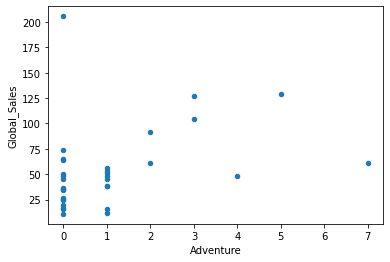

In [258]:
subdf.plot.scatter(x='Adventure', y='Global_Sales')

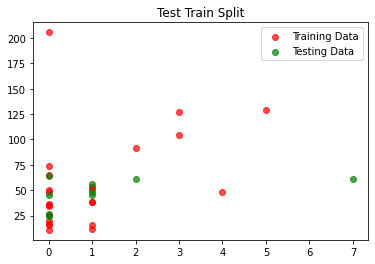

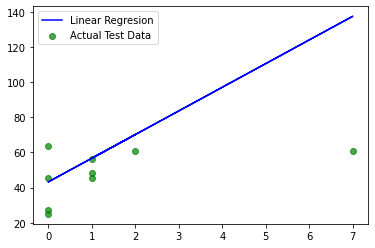

In [259]:
linear_regression(subdf, 'Adventure', 'Global_Sales')

<AxesSubplot:xlabel='Puzzle', ylabel='Global_Sales'>

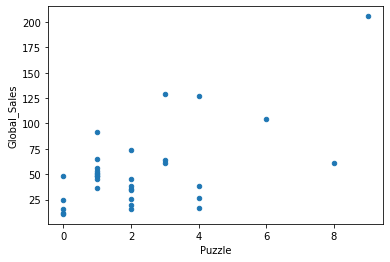

In [260]:
subdf.plot.scatter(x='Puzzle', y='Global_Sales')

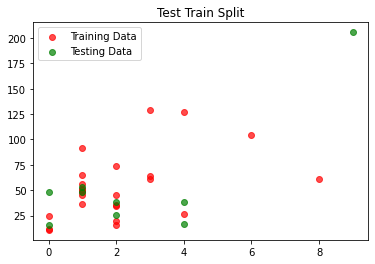

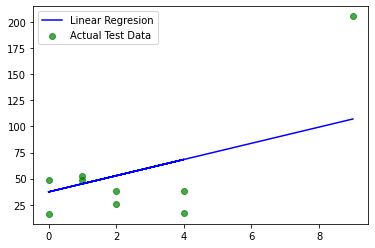

In [261]:
linear_regression(subdf, 'Puzzle', 'Global_Sales')

<AxesSubplot:xlabel='Shooter', ylabel='Global_Sales'>

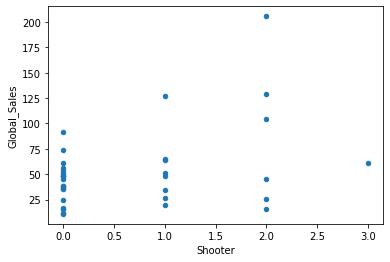

In [262]:
subdf.plot.scatter(x='Shooter', y='Global_Sales')

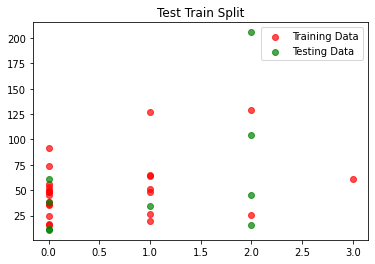

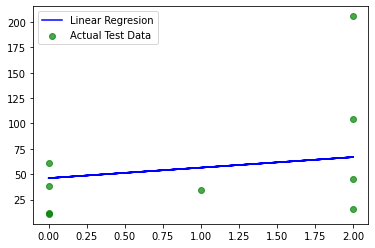

In [263]:
linear_regression(subdf, 'Shooter', 'Global_Sales')

<AxesSubplot:xlabel='Misc', ylabel='Global_Sales'>

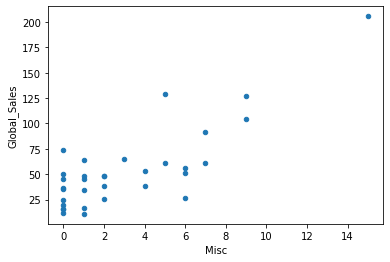

In [264]:
subdf.plot.scatter(x='Misc', y='Global_Sales')

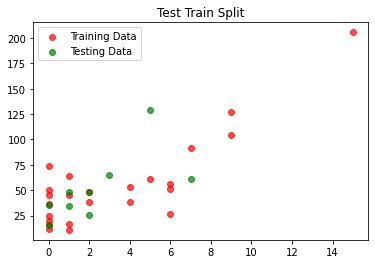

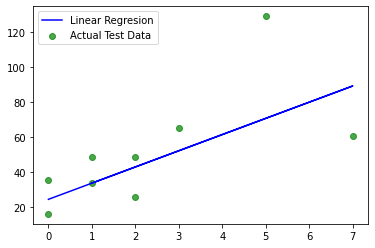

In [265]:
linear_regression(subdf, 'Misc', 'Global_Sales')

<AxesSubplot:xlabel='Sports', ylabel='Global_Sales'>

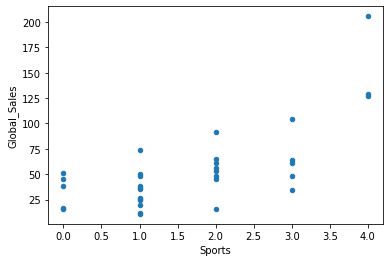

In [266]:
subdf.plot.scatter(x='Sports', y='Global_Sales')

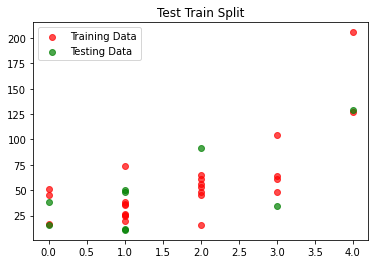

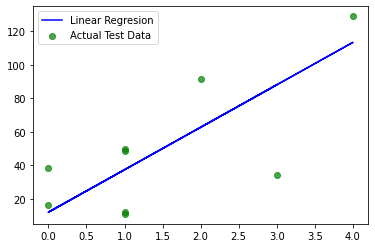

In [267]:
linear_regression(subdf, 'Sports', 'Global_Sales')

<AxesSubplot:xlabel='Racing', ylabel='Global_Sales'>

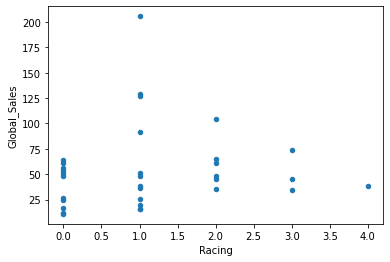

In [268]:
subdf.plot.scatter(x='Racing', y='Global_Sales')

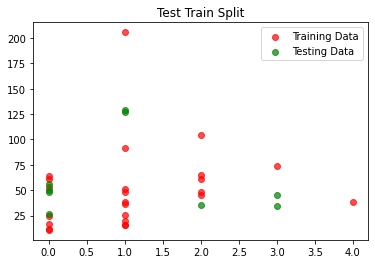

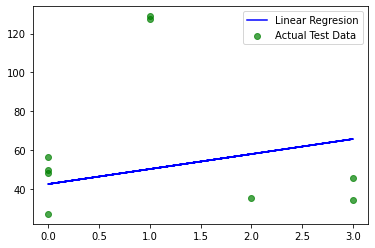

In [269]:
linear_regression(subdf, 'Racing', 'Global_Sales')

<AxesSubplot:xlabel='Simulation', ylabel='Global_Sales'>

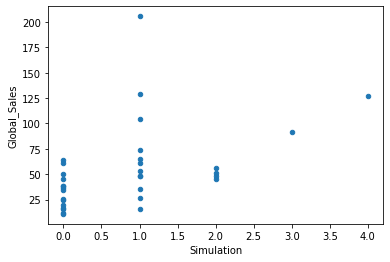

In [270]:
subdf.plot.scatter(x='Simulation', y='Global_Sales')

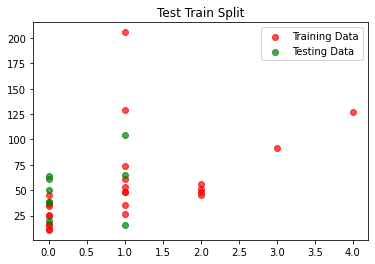

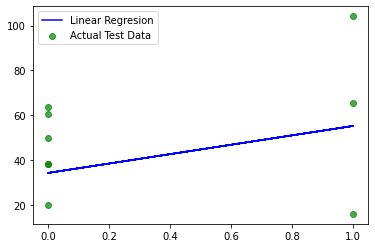

In [271]:
linear_regression(subdf, 'Simulation', 'Global_Sales')

<AxesSubplot:xlabel='Fighting', ylabel='Global_Sales'>

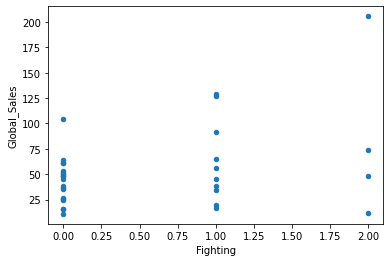

In [272]:

subdf.plot.scatter(x='Fighting', y='Global_Sales')

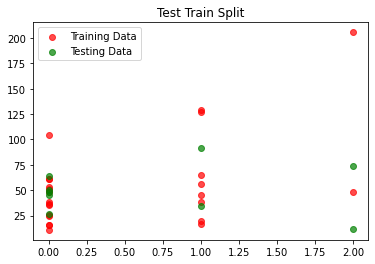

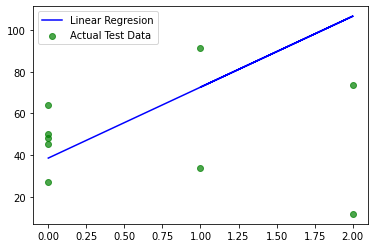

In [273]:
linear_regression(subdf, 'Fighting', 'Global_Sales')

<AxesSubplot:xlabel='Role-Playing', ylabel='Global_Sales'>

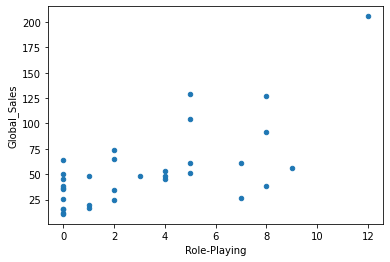

In [274]:
subdf.plot.scatter(x='Role-Playing', y='Global_Sales')

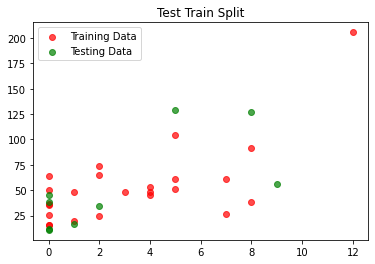

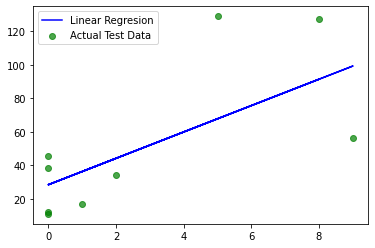

In [275]:
linear_regression(subdf, 'Role-Playing', 'Global_Sales')

<AxesSubplot:xlabel='Strategy', ylabel='Global_Sales'>

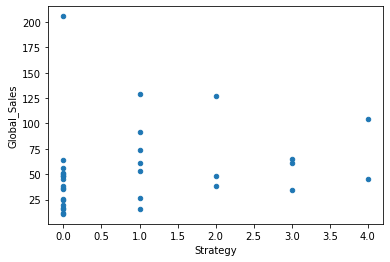

In [276]:
subdf.plot.scatter(x='Strategy', y='Global_Sales')

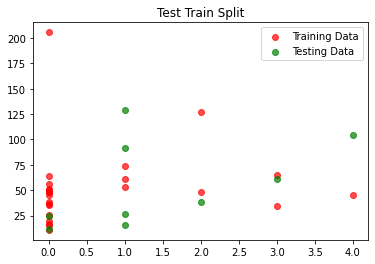

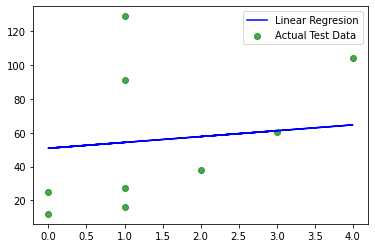

In [277]:
linear_regression(subdf, 'Strategy', 'Global_Sales')